In [38]:
import pandas as pd
import datetime
import quandl
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
%matplotlib inline

# Enter your quandl API key here
quandl.ApiConfig.api_key = open("quandl_code", "r").read()

### Collect for Google stock prices

In [39]:
goog = quandl.get("WIKI/GOOG")

In [40]:
goog.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13100.0,0.0,1.0,568.000,568.00,552.92,558.46,13100.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0,0.0,1.0,561.200,566.43,558.67,559.99,41100.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0,0.0,1.0,566.890,567.00,556.93,556.97,10800.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0,0.0,1.0,558.710,568.45,558.71,567.16,7900.0
2014-04-02,565.106,604.83,562.19,567.00,146700.0,0.0,1.0,565.106,604.83,562.19,567.00,146700.0


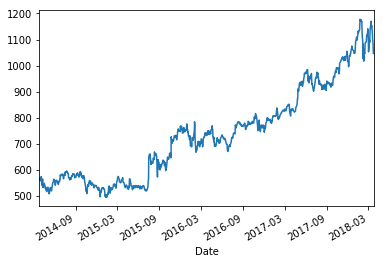

In [12]:
goog["Open"].plot()

In [25]:
goog.Open.max()

1177.33

## Frequency aggregation

We will need frequency based aggregation to aggregate for a certain time frame like month, year, 2 months etc. Resample method will do exactly that. It will aggregate results (min, max, mean, etc) for a particular period of time

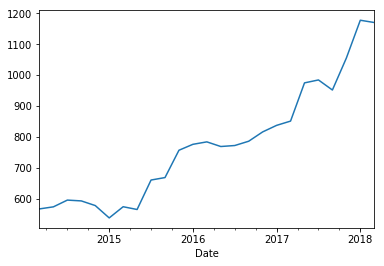

In [33]:
goog.resample("2M").max()["Open"].plot()

## Shift

Shift will shift the timeseries in a top or down direction which we can control using `periods` variable. 

In [41]:
goog.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13100.0,0.0,1.0,568.000,568.00,552.92,558.46,13100.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0,0.0,1.0,561.200,566.43,558.67,559.99,41100.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0,0.0,1.0,566.890,567.00,556.93,556.97,10800.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0,0.0,1.0,558.710,568.45,558.71,567.16,7900.0
2014-04-02,565.106,604.83,562.19,567.00,146700.0,0.0,1.0,565.106,604.83,562.19,567.00,146700.0


In [42]:
goog.shift(periods=1).head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-28,568.00,568.00,552.92,558.46,13100.0,0.0,1.0,568.00,568.00,552.92,558.46,13100.0
2014-03-31,561.20,566.43,558.67,559.99,41100.0,0.0,1.0,561.20,566.43,558.67,559.99,41100.0
2014-04-01,566.89,567.00,556.93,556.97,10800.0,0.0,1.0,566.89,567.00,556.93,556.97,10800.0
2014-04-02,558.71,568.45,558.71,567.16,7900.0,0.0,1.0,558.71,568.45,558.71,567.16,7900.0


Notice how the first row is NaNs. The entire dataframe has been shifted down and we've lost the last entry. We can similarly shift it upwards using `periods=-1`

## Rolling

Often stock prices will be very noisy. Using rolling windows we can aggregate (take mean) and make it less noisy. 

In [50]:
goog.rolling(window=5).mean().head(n=10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-02,563.9812,574.942,557.884,561.916,43920.0,0.0,1.0,563.9812,574.942,557.884,561.916,43920.0
2014-04-03,564.3512,578.798,560.126,564.172,1058340.0,0.0,1.0,564.3512,578.798,560.126,564.172,1058340.0
2014-04-04,567.0412,581.066,556.992,560.802,2320500.0,0.0,1.0,567.0412,581.066,556.992,560.802,2320500.0
2014-04-07,561.8112,577.362,551.036,557.038,3196260.0,0.0,1.0,561.8112,577.362,551.036,557.038,3196260.0
2014-04-08,558.5892,574.672,547.616,554.586,3823200.0,0.0,1.0,558.5892,574.672,547.616,554.586,3823200.0


Notice the first four entries are NaNs. Starting from the `window`th entry, the entries will be averaged accross the window size. 


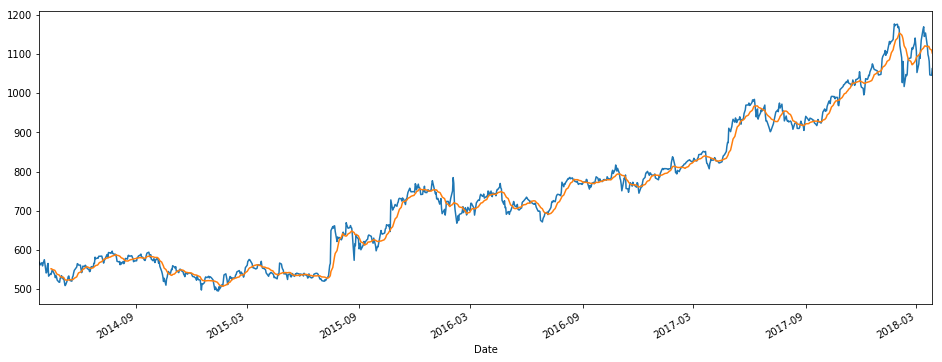

In [48]:
goog["Open"].plot()
goog.rolling(window=14).mean()["Close"].plot(figsize=(16, 6))

## Bollinger Bands

Bollinger Bands is an important concept to identify volatility in the market. It is a 20 day SMA (Simple Moving Average) and volatility with upper and lower bands. It uses Standard Deviation as a measure of volatility. It indicates narrower the band, lesser the volatility, and vice versa. 

The formula for plotting Bollinger Bands is:
```
1. Close: 20 Day SMA: Moving mean of 20 day window for "Close"
2. Upper: 20DaySMA + 2*std(Close)
2. Lower: 20DaySMA - 2*std(Close)
```

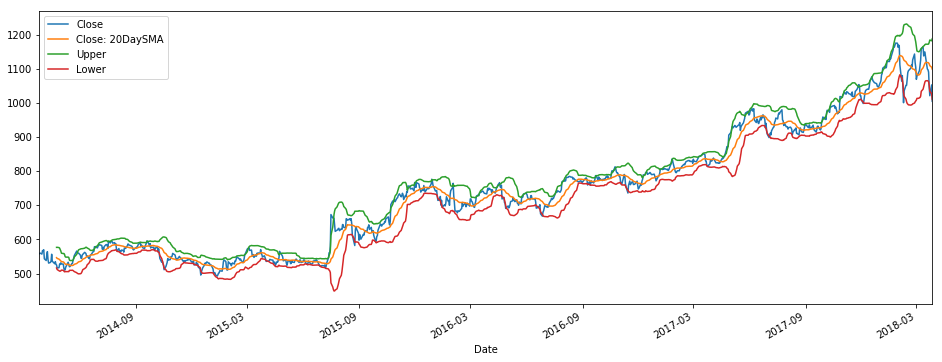

In [56]:
goog["Close: 20DaySMA"] = goog["Close"].rolling(window=20).mean()
goog["Upper"] = goog["Close: 20DaySMA"] + 2 * (goog["Close"].rolling(20).std())
goog["Lower"] = goog["Close: 20DaySMA"] - 2 * (goog["Close"].rolling(20).std())

# plot 
goog[["Close", "Close: 20DaySMA", "Upper", "Lower"]].plot(figsize=(16, 6))